In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import pandas as pd
import numpy as np

In [5]:
adultincome=pd.read_csv(r"C:\Users\shyam\OneDrive\MACHINE LEARNING PROGRAMS\adultincome.csv")

In [6]:
adultincome

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
s=adultincome.iloc[:,[0,2,4,10,11,12]].values

In [8]:
s

array([[    25, 226802,      7,      0,      0,     40],
       [    38,  89814,      9,      0,      0,     50],
       [    28, 336951,     12,      0,      0,     40],
       ...,
       [    58, 151910,      9,      0,      0,     40],
       [    22, 201490,      9,      0,      0,     20],
       [    52, 287927,      9,  15024,      0,     40]], dtype=int64)

In [9]:
scr = StandardScaler()

In [10]:
x = scr.fit_transform(s)

In [11]:
x

array([[-0.99512893,  0.35167453, -1.19725891, -0.14480353, -0.2171271 ,
        -0.03408696],
       [-0.04694151, -0.94552415, -0.41933527, -0.14480353, -0.2171271 ,
         0.77292975],
       [-0.77631645,  1.3947231 ,  0.74755018, -0.14480353, -0.2171271 ,
        -0.03408696],
       ...,
       [ 1.41180837, -0.35751025, -0.41933527, -0.14480353, -0.2171271 ,
        -0.03408696],
       [-1.21394141,  0.11198424, -0.41933527, -0.14480353, -0.2171271 ,
        -1.64812038],
       [ 0.97418341,  0.93049361, -0.41933527,  1.87131501, -0.2171271 ,
        -0.03408696]])

In [12]:
y = adultincome['income']

In [13]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1,test_size=0.2)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(39073, 6)
(39073,)
(9769, 6)
(9769,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [16]:
ypred = knn.predict(xtest)

In [17]:
confusion_matrix(ytest,ypred)

array([[6811,  576],
       [1286, 1096]], dtype=int64)

In [18]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       <=50K       0.84      0.92      0.88      7387
        >50K       0.66      0.46      0.54      2382

    accuracy                           0.81      9769
   macro avg       0.75      0.69      0.71      9769
weighted avg       0.80      0.81      0.80      9769



In [19]:
score = accuracy_score(ytest,ypred) * 100
score

80.93970723717882

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(xtrain,ytrain)

SVC()

In [25]:
y_pred = model.predict(xtest)

In [26]:
confusion_matrix(ytest,y_pred)

array([[7148,  239],
       [1485,  897]], dtype=int64)

In [27]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

       <=50K       0.83      0.97      0.89      7387
        >50K       0.79      0.38      0.51      2382

    accuracy                           0.82      9769
   macro avg       0.81      0.67      0.70      9769
weighted avg       0.82      0.82      0.80      9769



In [28]:
score = accuracy_score(ytest,y_pred) * 100
score

82.35233903163068

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
clfr=RandomForestClassifier(n_estimators=10,criterion='gini')
clfr.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10)

In [31]:
ypre=clfr.predict(xtest)

In [33]:
output=confusion_matrix(ytest,ypre)
print('Confusion matrix output: ')
output

Confusion matrix output: 


array([[6698,  689],
       [1173, 1209]], dtype=int64)

In [35]:
output1=classification_report(ytest,ypre)
print('Classification report')
print(output1)

Classification report
              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      7387
        >50K       0.64      0.51      0.56      2382

    accuracy                           0.81      9769
   macro avg       0.74      0.71      0.72      9769
weighted avg       0.80      0.81      0.80      9769



In [38]:
output2=accuracy_score(ytest,ypre)*100
print(output2)

80.93970723717882


In [39]:
a = pd.Series([ 'SUPPORT VECTOR MACHINE ALGORITHM' , 'K NEAREST NEIGHBOR ALGORITHM' ,'RANDOM FOREST CLASSIFIER ALGORITHM'])

In [40]:
b = np.array([82.35233903163068,80.93970723717882,80.93970723717882])

In [41]:
c ={'ALGORITHMS':a,'ACCURACY SCORES':b}

In [42]:
d = pd.DataFrame(c)

In [43]:
d

,ALGORITHMS,ACCURACY SCORES
0,SUPPORT VECTOR MACHINE ALGORITHM,82.352339
1,K NEAREST NEIGHBOR ALGORITHM,80.939707
2,RANDOM FOREST CLASSIFIER ALGORITHM,80.939707


[Text(0, 0, 'SUPPORT VECTOR MACHINE ALGORITHM'),
 Text(1, 0, 'K NEAREST NEIGHBOR ALGORITHM'),
 Text(2, 0, 'RANDOM FOREST CLASSIFIER ALGORITHM')]

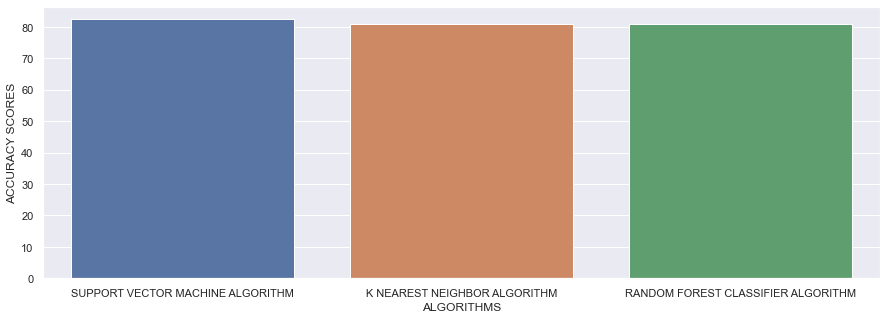

In [44]:
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x='ALGORITHMS',y='ACCURACY SCORES',data=d)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)